In [1]:
import torch

## 基本使用
创建一个矩阵. 生成一个tensor一个矩阵计算单元.

In [2]:
x=torch.empty(5,3)
x

tensor([[8.9082e-39, 1.0194e-38, 9.1837e-39],
        [8.4490e-39, 1.0102e-38, 1.0561e-38],
        [1.0286e-38, 1.0653e-38, 1.0194e-38],
        [4.6838e-39, 8.4489e-39, 9.6429e-39],
        [8.4490e-39, 9.6429e-39, 9.2755e-39]])

创建一个随机矩阵

In [3]:
x=torch.rand(5,3)
x

tensor([[0.5123, 0.9206, 0.5875],
        [0.1893, 0.0910, 0.9560],
        [0.6411, 0.5003, 0.2505],
        [0.5083, 0.7580, 0.7514],
        [0.3242, 0.1301, 0.0232]])

创建一个全零矩阵

In [4]:
x=torch.zeros(5,3)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

直接传入数据

In [5]:
x=torch.tensor([5.5,3])
x

tensor([5.5000, 3.0000])

创建一个全1的矩阵

In [6]:
x=torch.ones(5,3,dtype=torch.double) # 类型是double
x=torch.randn_like(x,dtype=torch.float)
x

tensor([[-4.1784e-01, -1.1847e-01,  7.1624e-02],
        [ 3.0063e-01, -3.6353e-02, -1.6981e+00],
        [-8.6839e-02, -1.0687e-01,  4.1856e-01],
        [-3.9465e-01, -1.0136e+00,  1.7416e-01],
        [ 6.5426e-01, -1.4649e-03,  1.7733e+00]])

显示矩阵大小

In [7]:
x.size()

torch.Size([5, 3])

计算

In [8]:
y=torch.rand(5,3) 
x+y ## torch.add(x,y)

tensor([[ 0.2853,  0.2271,  0.5934],
        [ 0.3769,  0.1468, -1.6796],
        [ 0.0567, -0.0415,  0.8706],
        [ 0.4740, -0.7465,  0.5457],
        [ 1.0027,  0.0514,  2.3958]])

切片

In [9]:
x[:,1]

tensor([-0.1185, -0.0364, -0.1069, -1.0136, -0.0015])

view可以改变矩阵的维度

rand和randn的区别在于随机出来的数字
- rand 随机出来的数字是均匀分布的
- randn 随机出来的数字是正态分布的

In [10]:
x=torch.randn(4,4)
y=x.view(16)
z=x.view(-1,8) # -1表示自动计算维度
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


与numpy协同

In [11]:
a=torch.ones(5)
b=a.numpy()
b

array([1., 1., 1., 1., 1.], dtype=float32)

In [12]:
import numpy as np
a=np.ones(5)
b=torch.from_numpy(a)
b


tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

## 常见的tenser格式
- scalar
- vector
- matrix
- n-dimensional tensor

### Scalar
通常就是一个简单的数值

In [13]:
from torch import tensor
x = tensor(42)
x

tensor(42)

In [14]:
x.dim() # 查看维度

0

In [15]:
2*x # 运算操作

tensor(84)

In [16]:
x.item() # 获取原始数据


42

### vector
向量, 一般表示这某一个特征,比如 [0,1,2,3]

In [17]:
v = tensor([1.5,-0.5,3])
v

tensor([ 1.5000, -0.5000,  3.0000])

In [18]:
v.dim()

1

In [19]:
v.size()

torch.Size([3])

### Matrix
一般都是矩阵, 通常都是多维的

In [20]:
M = tensor([[1,2],[3,4]]) # 直接传入一个list就可以
M

tensor([[1, 2],
        [3, 4]])

In [21]:
3 * M # 简单的标量乘法, 每一个都乘一遍

tensor([[ 3,  6],
        [ 9, 12]])

In [22]:
M.matmul(M) # 矩阵乘法, 和numpy的@还有matmul方法作用相同. 需要满足乘法要求

tensor([[ 7, 10],
        [15, 22]])

In [23]:
tensor([1,0]).matmul(M) 

tensor([1, 2])

![image](./assets/2.png)

### hub模块
调用别人已经训练好的模型.

<https://pytorch.org/hub/research-models>

<https://github.com/pytorch/hub>

下面就调用一下模型. 下载一个文件来进行边框检测. 

![image](./assets/deeplab1.png)

In [24]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet50', pretrained=True)
model.eval()

Using cache found in C:\Users\Shuo Wang/.cache\torch\hub\pytorch_vision_v0.10.0


DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [25]:
# Download an example image from the pytorch website
import urllib
url, filename = ("https://github.com/pytorch/hub/raw/master/images/deeplab1.png", "assets/deeplab1.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [26]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)


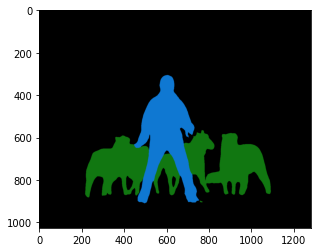

In [27]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
plt.show()